## PPI Graph Features

#### Libraries

In [2]:
import pickle
import networkx as nx
import os
# import pandas as pd
import matplotlib.pyplot as plt
import statistics

#### Variables

In [3]:
# Name of the files to load
PPI_list_variable_corrected_updated = "data/PPI_of_interest_corrected updated"

# Name of the files to save/load
Graph_of_PPI_file_name = "results/PPIGraph/Graph_of_PPI"
Graph_of_PPI_LCC_file_name = "results/PPIGraph/Graph_of_PPI_LCC"
Degrees_Histogram_Visualization = "results/PPIGraph/Degrees Histogram Visualization"
LCC_average_shortest_path_file_name = "results/PPIGraph/LCC_average_shortest_path"
LCC_clustering_coefficient_file_name = "results/PPIGraph/LCC_clustering_coefficient"
LCC_Density_file_name = "results/PPIGraph/LCC_Density"
LLC_Global_Efficiency_file_name = "results/PPIGraph/LLC_Global_Efficiency"

# other strings we'll use
First_gene_symbol_indicator = "Official Symbol Interactor A"
Second_gene_symbol_indicator = "Official Symbol Interactor B"

#### Load files

In [4]:
with open(PPI_list_variable_corrected_updated, "rb") as file:
    PPI = pickle.load(file)
    

#### Function we utilize

In [5]:
def Load_or_Save_Variable_from_nx_method(file_name, Graph, nx_method):
    if not os.path.exists(file_name):
        Variable = nx_method(Graph)
        with open(file_name, "wb") as file:
            pickle.dump(Variable, file)
    else:
        with open(file_name, "rb") as file:
            Variable = pickle.load(file)
    return Variable

#### Produce the Graph and the LCC

In [6]:
if not (os.path.exists(Graph_of_PPI_file_name)
        and os.path.exists(Graph_of_PPI_LCC_file_name)):
    Graph_of_PPI = nx.from_pandas_edgelist(
        PPI, First_gene_symbol_indicator, Second_gene_symbol_indicator)
    with open(Graph_of_PPI_file_name, "wb") as file:
        pickle.dump(Graph_of_PPI, file)

    Connected_Components = nx.connected_components(Graph_of_PPI)
    largest_cc = max(Connected_Components, key=len)
    Graph_of_PPI_LCC = nx.subgraph(Graph_of_PPI, largest_cc).copy()
    with open(Graph_of_PPI_LCC_file_name, "wb") as file:
        pickle.dump(Graph_of_PPI, file)

else:
    with open(Graph_of_PPI_file_name, "rb") as file:
        Graph_of_PPI = pickle.load(file)
    with open(Graph_of_PPI_LCC_file_name, "rb") as file:
        Graph_of_PPI_LCC = pickle.load(file)

print("Features of the initial PPI:\n" + str(Graph_of_PPI) + "\n")
print("Features of the LCC from the initial PPI:\n" + str(Graph_of_PPI_LCC) + "\n")

Features of the initial PPI:
Graph with 19972 nodes and 861240 edges

Features of the LCC from the initial PPI:
Graph with 19972 nodes and 861240 edges



#### Degree-Related Feature: Scale Free Tendency

In [7]:
degress_of_LCC_dictionary = dict(Graph_of_PPI.degree())
degrees_of_LCC_dictionary_sorted = \
    dict(sorted(degress_of_LCC_dictionary.items(), key=lambda item: item[1],
                reverse=True))
degrees_of_LCC_values = list(degress_of_LCC_dictionary.values())
degrees_of_LCC_keys = list(degress_of_LCC_dictionary.keys())
mean_degree_of_LCC = statistics.mean(degrees_of_LCC_values)
median_degree_of_LCC = statistics.median(degrees_of_LCC_values)

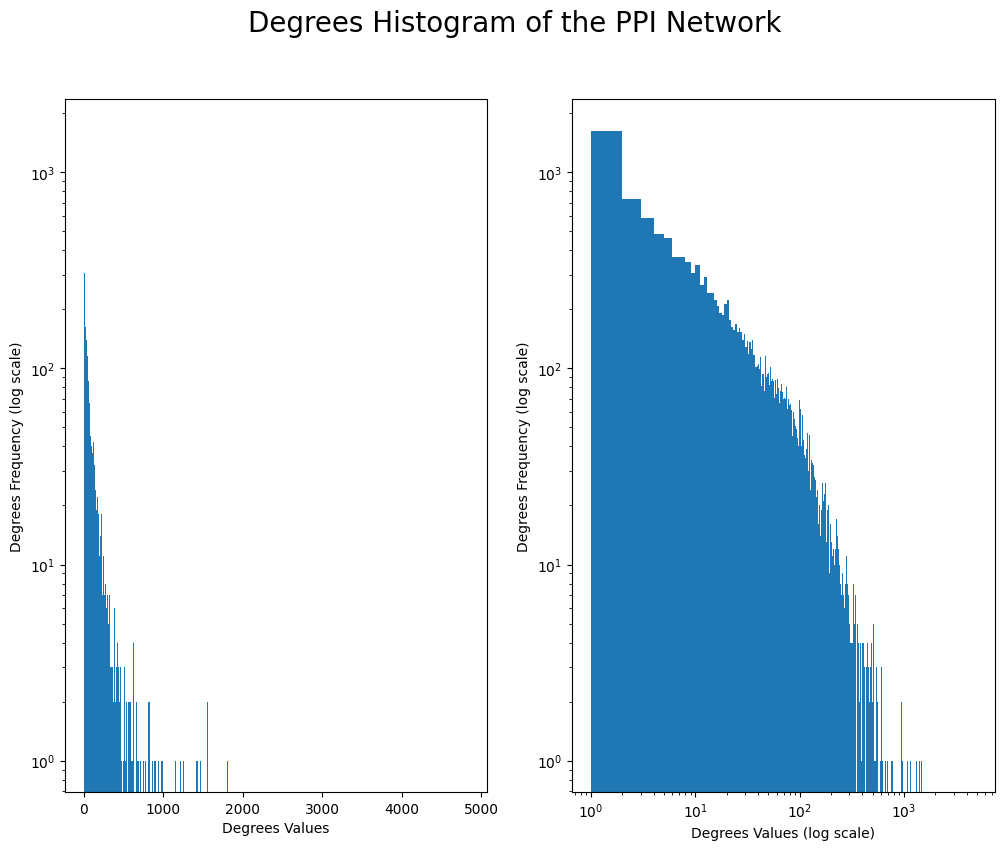

In [8]:
plt.figure(figsize=(12, 9))
plt.subplot(1, 2, 1)
plt.hist(degrees_of_LCC_values,
         bins=range(min(degrees_of_LCC_values), max(degrees_of_LCC_values) + 1))
plt.yscale('log')
plt.xlabel("Degrees Values")
plt.ylabel("Degrees Frequency (log scale)")
plt.subplot(1, 2, 2)
plt.hist(degrees_of_LCC_values,
         bins=range(min(degrees_of_LCC_values), max(degrees_of_LCC_values) + 1))
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Degrees Values (log scale)")
plt.ylabel("Degrees Frequency (log scale)")
plt.suptitle("Degrees Histogram of the PPI Network", fontsize=20)
plt.savefig(Degrees_Histogram_Visualization, dpi=500, bbox_inches='tight')

Text(0.5, 0.98, 'Degrees Histogram of the PPI Network')

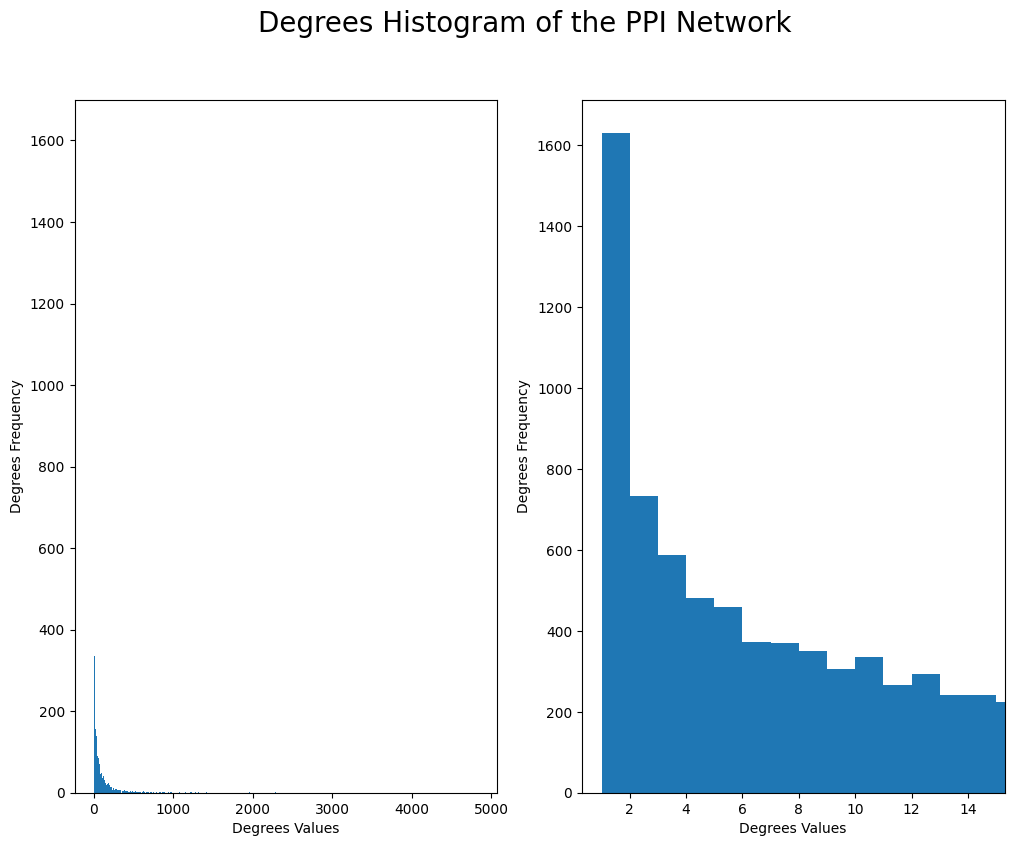

In [9]:
plt.figure(figsize=(12, 9))
plt.subplot(1, 2, 1)
plt.hist(degrees_of_LCC_values,
         bins=range(min(degrees_of_LCC_values), max(degrees_of_LCC_values) + 1))
plt.xlabel("Degrees Values")
plt.ylabel("Degrees Frequency")
plt.ylim(0, 1700)
plt.subplot(1, 2, 2)
plt.hist(degrees_of_LCC_values,
         bins=range(min(degrees_of_LCC_values), max(degrees_of_LCC_values) + 1))
plt.xlim(0.3, 15.3)
plt.xlabel("Degrees Values")
plt.ylabel("Degrees Frequency")
plt.suptitle("Degrees Histogram of the PPI Network", fontsize=20)

##### Efficiency Features

In [12]:
LCC_average_shortest_path = \
    Load_or_Save_Variable_from_nx_method(LCC_average_shortest_path_file_name,
                                         Graph_of_PPI_LCC,
                                         nx.average_shortest_path_length)

print(f"The Average Shortest Path of the interactome LCC is : {LCC_average_shortest_path}")

The Average Shortest Path of the interactome LCC is : 2.723794650450644


In [13]:
LCC_clustering_coefficient = \
    Load_or_Save_Variable_from_nx_method(LCC_clustering_coefficient_file_name,
                                         Graph_of_PPI_LCC,
                                         nx.clustering)
LCC_clustering_coefficient_Values = list(LCC_clustering_coefficient.values())
LCC_mean_clustering_coefficient = statistics.mean(LCC_clustering_coefficient_Values)
print(f"The mean clustering coefficient of the interactome LCC is: {LCC_mean_clustering_coefficient}")

The mean clustering coefficient of the interactome LCC is: 0.13632454917886333


In [14]:
LCC_Density = \
    Load_or_Save_Variable_from_nx_method(LCC_Density_file_name,
                                         Graph_of_PPI_LCC,
                                         nx.density)
print(f"The density of the interactome LCC is: {LCC_Density}")

The density of the interactome LCC is: 0.00431849895547021


In [15]:
LLC_Global_Efficiency = \
    Load_or_Save_Variable_from_nx_method(LLC_Global_Efficiency_file_name,
                                         Graph_of_PPI_LCC,
                                         nx.global_efficiency)
print(f"The global density of the interactome LCC is: {LLC_Global_Efficiency}")

The global density of the interactome LCC is: 0.38609797253726214
